<a href="https://colab.research.google.com/github/shreya2118/Deep_learning/blob/main/GraduateAdmission_regression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a regression problem which we are going to solve using ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df=pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns=['Serial No.'])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
X_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,94,301,97,2,3.0,3.0,7.88,1
23,24,334,119,5,5.0,4.5,9.70,1
299,300,305,112,3,3.0,3.5,8.65,0
13,14,307,109,3,4.0,3.0,8.00,1
90,91,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...,...
255,256,307,110,4,4.0,4.5,8.37,0
72,73,321,111,5,5.0,5.0,9.45,1
396,397,325,107,3,3.0,3.5,9.11,1
235,236,326,111,5,4.5,4.0,9.23,1


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
X_train_scaled

array([[0.23308271, 0.22      , 0.17857143, ..., 0.42857143, 0.25      ,
        1.        ],
       [0.05764411, 0.88      , 0.96428571, ..., 0.85714286, 0.91911765,
        1.        ],
       [0.74937343, 0.3       , 0.71428571, ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.9924812 , 0.7       , 0.53571429, ..., 0.57142857, 0.70220588,
        1.        ],
       [0.58897243, 0.72      , 0.67857143, ..., 0.71428571, 0.74632353,
        1.        ],
       [0.09273183, 0.2       , 0.46428571, ..., 0.14285714, 0.22058824,
        0.        ]])

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [28]:
model=Sequential()

model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))       # with regression--- we use linear function in output layer

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [31]:
history=model.fit(X_train_scaled,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 1.9611 - val_loss: 1.7402
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5001 - val_loss: 1.3287
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1243 - val_loss: 0.9926
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8136 - val_loss: 0.7236
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6010 - val_loss: 0.5138
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4184 - val_loss: 0.3570
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2569 - val_loss: 0.2427
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1935 - val_loss: 0.1602
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1170 - val_loss: 0.1050
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0818 - val_loss: 0.0691
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0476 - val_loss: 0.0470
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0369 - val_loss: 0.0338
E

In [32]:
y_pred=model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2910276080497135

IF WE INCREASE MORE EPOCHS, WE WILL REACH TO APPROX 76 R2 SCORE

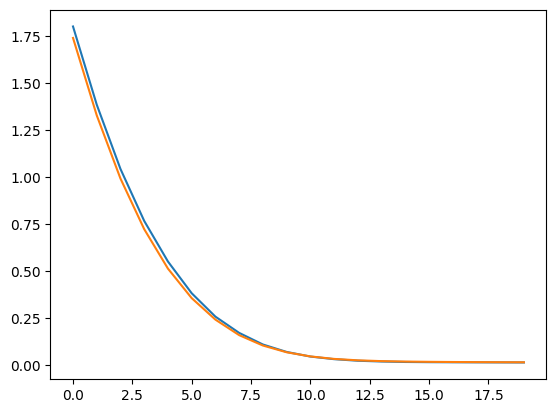

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])